#Problem Statement

Predicting the retail customer retention potential level as high/medium/low &  Customer Segmentation & Pattern extraction.

It is important for any retail company to focus on customer though continuous engagement which translates to increased sales and resultant profitability measured over a period. The customer churn results in not just loss of potential revenue and future profits together with sunk acquisition costs but also negative publicity and incurrence of additional cost of new acquisitions.

On the other hand, Customer focus leads to retention which in turn leads to generation of value, not just volumes. Thus, understanding of customer churn and the underlying factors is central to customer relationship management.

Retailers develop metric to capture customer response towards the product, service, price and competition so that they offer better products and service delivery to customers in comparison with competition. In retail business, a customer is treated as churned once his/her transactions/interactions/visits outdate a particular amount of time. It happens when the product/service is no more used or he uses a product/service of competitor. It is useful to understand defected customer in terms of interests and preferences  to win them back.

It is possible to understand the customer based on historical data of customers containing the characteristics of customers, their transactions, the interactions with them  etc. Customer churn predictions help the retail company devise suitable marketing programs to target specific groups of retail customers as part of continued engagement. To ensure that such marketing spend is appropriately directed to the customers likely to be retained and/or with high probability of retention, we are required to classify the retention potential of customer as High/Medium/Low.

Here identifying the medium level customers is important as this category indicates where some intelligent action may lead to high possibility of retaining the customers who are likely to churn.

#Import all the Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#Import the Datasets

##Customerdata_Train

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Read the Customer data path

Customerdata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Customerdata_Train.xlsx'

In [12]:
# Read the excel file

customerdata = pd.read_excel(Customerdata_filepath)

In [13]:
# Print the first five rows of the data

customerdata.head(10)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
5,C13831,CITY2,2010-12-29,1,0,0,Monday
6,C40881,CITY2,2010-09-22,0,0,1,Friday
7,C26246,CITY2,2009-11-16,0,0,0,Wednesday
8,C36136,CITY2,2009-07-25,1,1,1,Monday
9,C34046,CITY2,2010-03-14,0,0,0,Tuesday


In [14]:
# Check the shape of the data

customerdata.shape

(23820, 7)

In [15]:
#info method returns a concise summary of the data.

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [16]:
#Describe function to generate a statistical summary that describes the data.

customerdata.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [17]:
#Describe function to generate a statistical summary that describes the categorical data.

customerdata.describe(include='O')

,CustomerID,City,PreferredDeliveryDay
count,23820,23820,23820
unique,23820,4,7
top,C16368,CITY4,Tuesday
freq,1,9143,5343


In [18]:
#Check the null values

customerdata.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [19]:
def process_date_columns(df, date_col):
    
    # Convert the date column to string
    df[date_col] = df[date_col].astype(str)

    # Apply strptime() to each string in the date column
    df[date_col] = df[date_col].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

    # Extract the year, month, and day values from the datetime objects
    df[f'{date_col}_Year'] = df[date_col].apply(lambda x: x.year)
    df[f'{date_col}_Month'] = df[date_col].apply(lambda x: x.month)
    df[f'{date_col}_Day'] = df[date_col].apply(lambda x: x.day)

    # Return the modified dataframe
    return df


In [20]:
# Asign the extracted columns to cutomerdata

customerdata = process_date_columns(customerdata, 'DateOfRegistration')

In [21]:
# Print the first five rows

customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4


In [22]:
# Print the info of the data

customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                23820 non-null  object        
 1   City                      23820 non-null  object        
 2   DateOfRegistration        23820 non-null  datetime64[ns]
 3   OnlineCommunication       23820 non-null  int64         
 4   AutomaticRefill           23820 non-null  int64         
 5   DoorstepDelivery          23820 non-null  int64         
 6   PreferredDeliveryDay      23820 non-null  object        
 7   DateOfRegistration_Year   23820 non-null  int64         
 8   DateOfRegistration_Month  23820 non-null  int64         
 9   DateOfRegistration_Day    23820 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.8+ MB


##Emaildata_Train

In [24]:
# Read the Email data path

Emaildata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Emaildata_Train.xlsx'

In [25]:
# Read the excel file

emaildata = pd.read_excel(Emaildata_filepath)

In [26]:
# Print the first five rows of the data

emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [27]:
# Check the shape of the data

emaildata.shape

(517672, 6)

In [28]:
# Check the value_counts of each eamil type

emaildata['EmailType'].value_counts()

CustomizedEmail    493852
WelcomeEmail        23820
Name: EmailType, dtype: int64

In [29]:
#info method returns a concise summary of the data.

emaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [30]:
#Describe function to generate a statistical summary that describes the data.

emaildata.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


In [31]:
#Check the null values

emaildata.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [32]:
# Assign the extract features to emaaildata

emaildata = process_date_columns(emaildata, 'DateOfemail')
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010,12,19
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010,10,3
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010,11,27
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009,12,4


##Train_Data

In [34]:
# Read the Traindata path

Traindata_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/Train.xlsx'

In [35]:
# Read the excel file

traindata = pd.read_excel(Traindata_filepath)

In [36]:
# Print the first five rows of the data

traindata.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [37]:
# Check the shape of the data

traindata.shape

(23820, 2)

In [ ]:
#info method returns a concise summary of the data.

traindata.info()

In [38]:
#Describe function to generate a statistical summary that describes the data.

traindata.describe()

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C37869,Low
freq,1,19185


In [39]:
#Check the null values

traindata.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

##Transactionsdata_Train

In [41]:
# Read the Transactions data file path

Transactions_filepath = r'/content/drive/MyDrive/CAPSTONE/Train/transactionsdata_Train.xlsx'

In [42]:
# Read the excel file

transactionsdata = pd.read_excel(Transactions_filepath)

In [43]:
# Print the first five rows of the data

transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [44]:
#Check the shape of the data

transactionsdata.shape

(104755, 4)

In [45]:
#info method returns a concise summary of the data.

transactionsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [46]:
#Describe function to generate a statistical summary that describes the data.

transactionsdata.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [47]:
#Check the null values

transactionsdata.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [48]:
transactionsdata = process_date_columns(transactionsdata, 'DateOfOrder')
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,DateOfOrder_Year,DateOfOrder_Month,DateOfOrder_Day
0,C16368,2013-08-11,15:17:52,15,2013,8,11
1,C20345,2011-04-01,19:50:00,92,2011,4,1
2,C20345,2012-06-29,15:11:56,95,2012,6,29
3,C20345,2012-09-22,20:49:10,74,2012,9,22
4,C20345,2011-08-23,11:50:26,81,2011,8,23


In [49]:
# extract hour from timestamp column

transactionsdata['transaction_hour'] = pd.to_datetime(transactionsdata['timestamp']).dt.hour
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,DateOfOrder_Year,DateOfOrder_Month,DateOfOrder_Day,transaction_hour
0,C16368,2013-08-11,15:17:52,15,2013,8,11,15
1,C20345,2011-04-01,19:50:00,92,2011,4,1,19
2,C20345,2012-06-29,15:11:56,95,2012,6,29,15
3,C20345,2012-09-22,20:49:10,74,2012,9,22,20
4,C20345,2011-08-23,11:50:26,81,2011,8,23,11


#Visualizations

## Customerdata_Train

In [50]:
def plot_countplots_with_count(df, columns, rows=1, cols=1, figsize=(12, 4)):
    # Create subplots for the number of rows and columns
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    
    # Flatten axs if it's not already a 1D array
    if isinstance(axs, np.ndarray):
        axs = axs.flatten()

    # Loop through each column and plot the count of customers
    for i, col in enumerate(columns):
        sns.countplot(x=col, data=df, palette='rocket', ax=axs[i])
        
        # Add count at the top of each bar
        for p in axs[i].patches:
            axs[i].annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

        # Set axis labels and title for each subplot
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].set_title(f'Count of Customers by {col}')

    # Adjust subplot spacing and display the plot
    fig.tight_layout()
    plt.show()



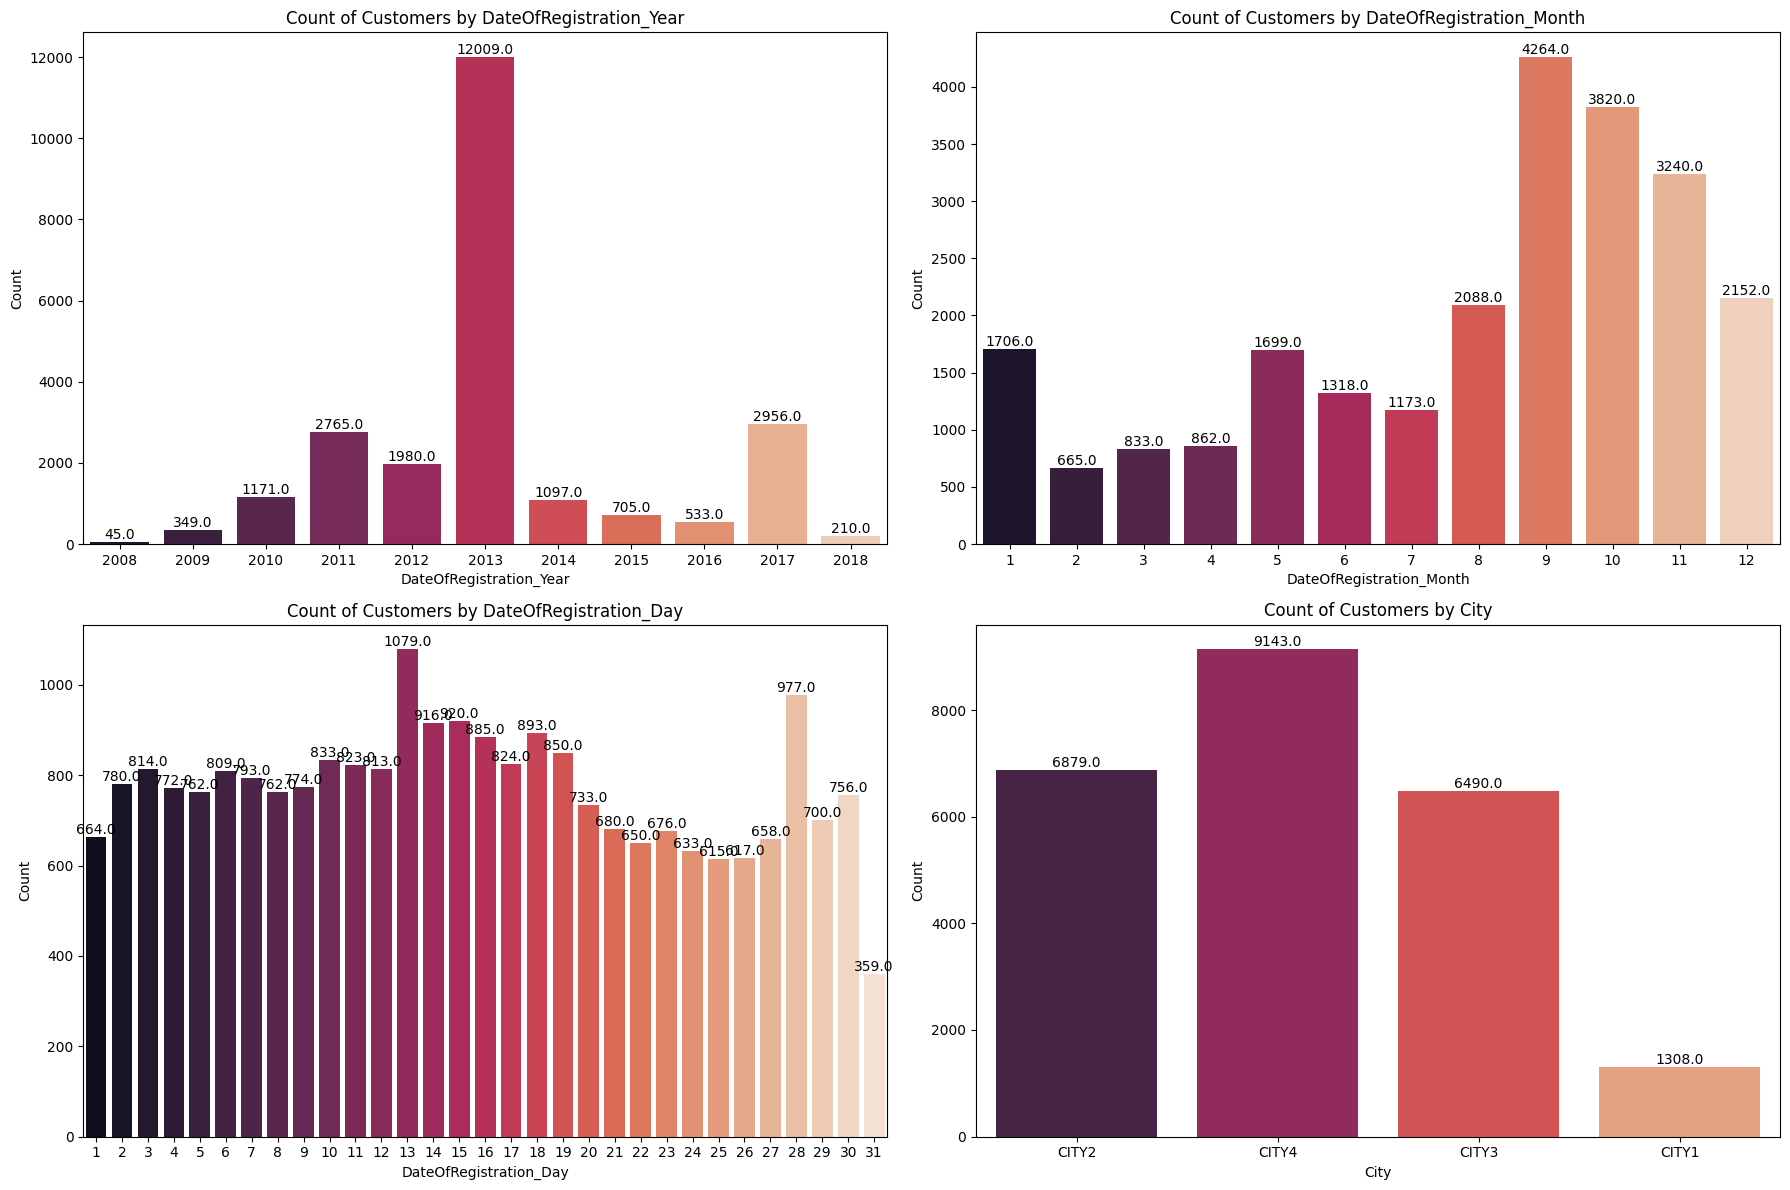

In [51]:
# Define the list of columns to plot
columns_to_plot = ['DateOfRegistration_Year', 'DateOfRegistration_Month', 'DateOfRegistration_Day', 'City']

# Call the function with the data, columns, and size
plot_countplots_with_count(customerdata, columns_to_plot,rows=2, cols=2, figsize=(18, 12))


-> The data ranges from 2008 to 2018.

-> In 2013, there were more registrations compared to other years.

-> The months from August to December have the highest number of registrations.

-> The middle of the month has higher registration numbers.

-> There are very few registered people in City 1.

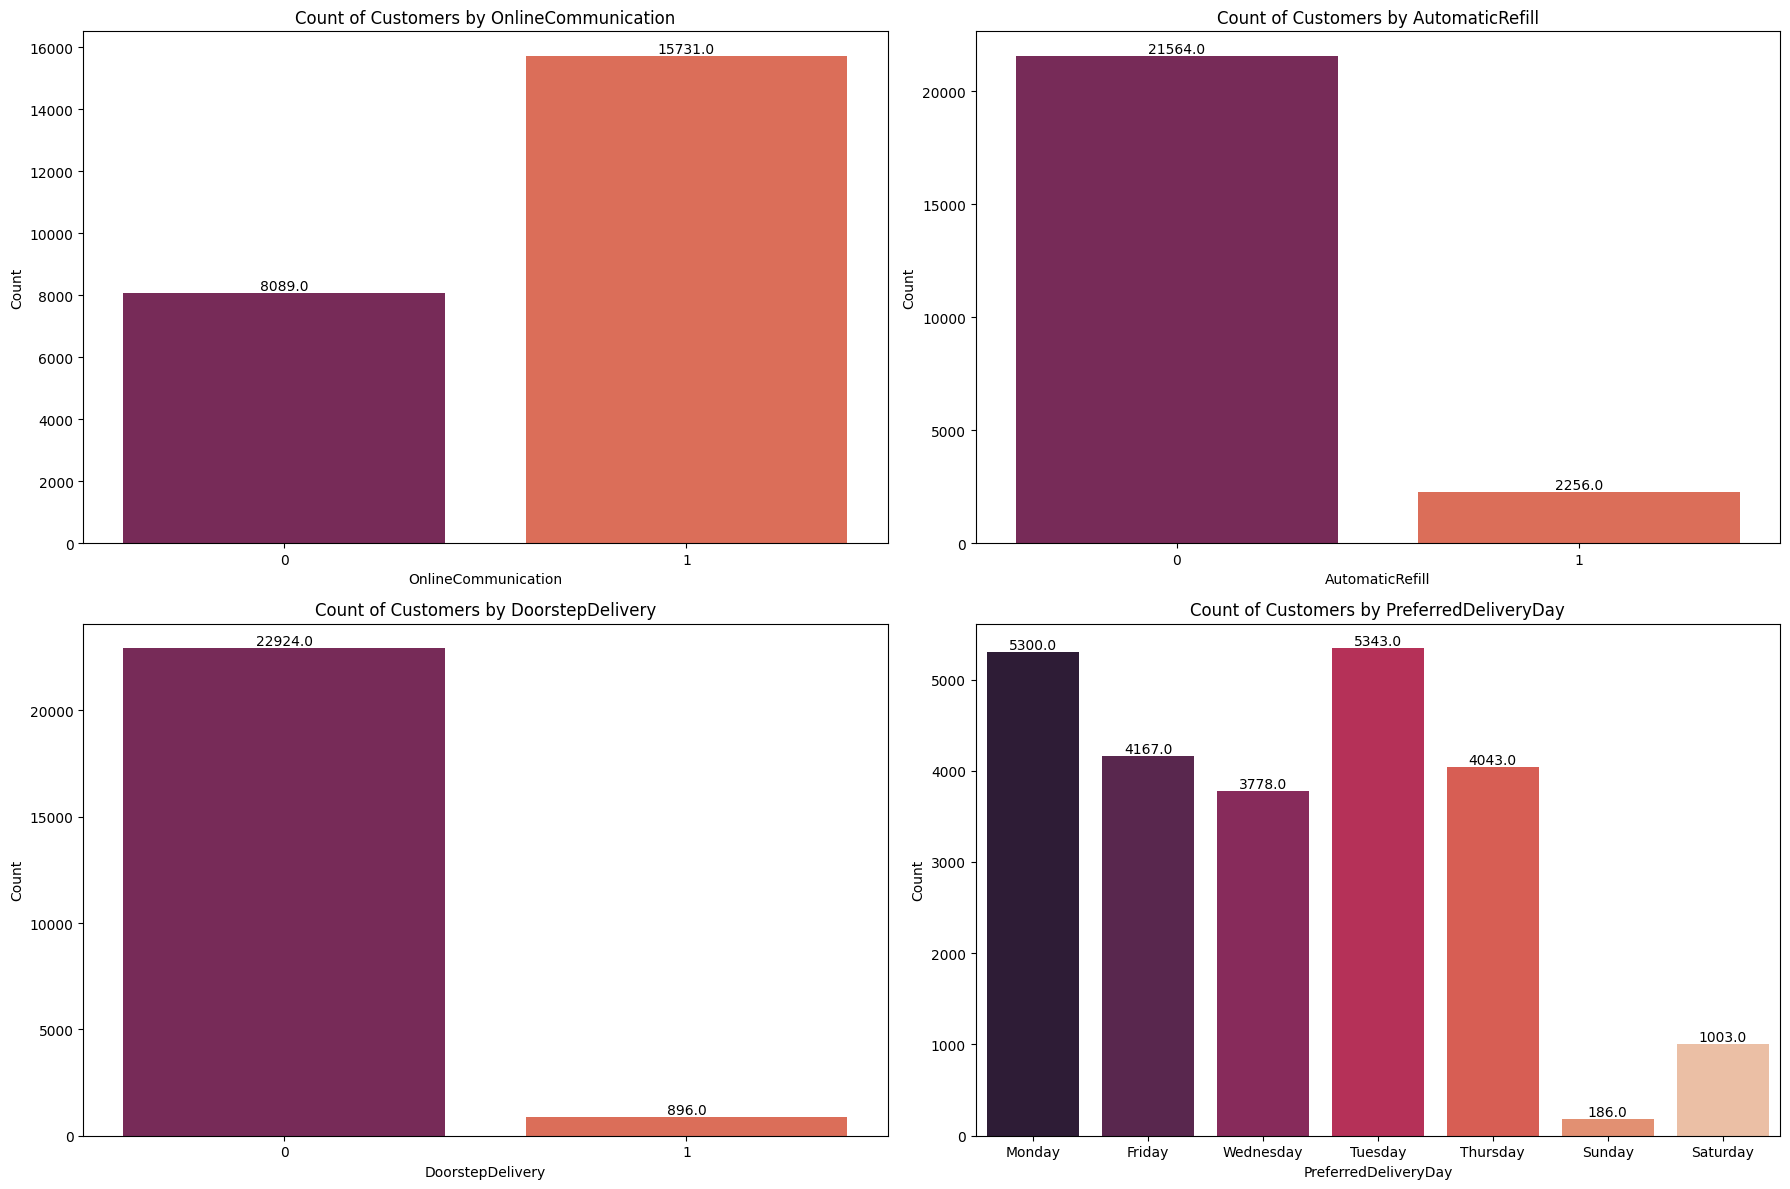

In [52]:
# Define the list of columns to plot
columns_to_plot = ['OnlineCommunication',	'AutomaticRefill',	'DoorstepDelivery','PreferredDeliveryDay']

# Call the function with the data, columns, and size
plot_countplots_with_count(customerdata, columns_to_plot,rows=2, cols=2, figsize=(18, 12))


-> Customers who opt for online communication are more common.

-> Very few customers opt for automatic refill.

-> Most customers do not prefer doorstep delivery.

-> Most customers prefer delivery on weekdays.

In [53]:
# Count the number of customers registered by year

customer_counts_by_year = customerdata.groupby('DateOfRegistration_Year')['CustomerID'].nunique()

print(customer_counts_by_year)

DateOfRegistration_Year
2008       45
2009      349
2010     1171
2011     2765
2012     1980
2013    12009
2014     1097
2015      705
2016      533
2017     2956
2018      210
Name: CustomerID, dtype: int64


## Emaildata_Train

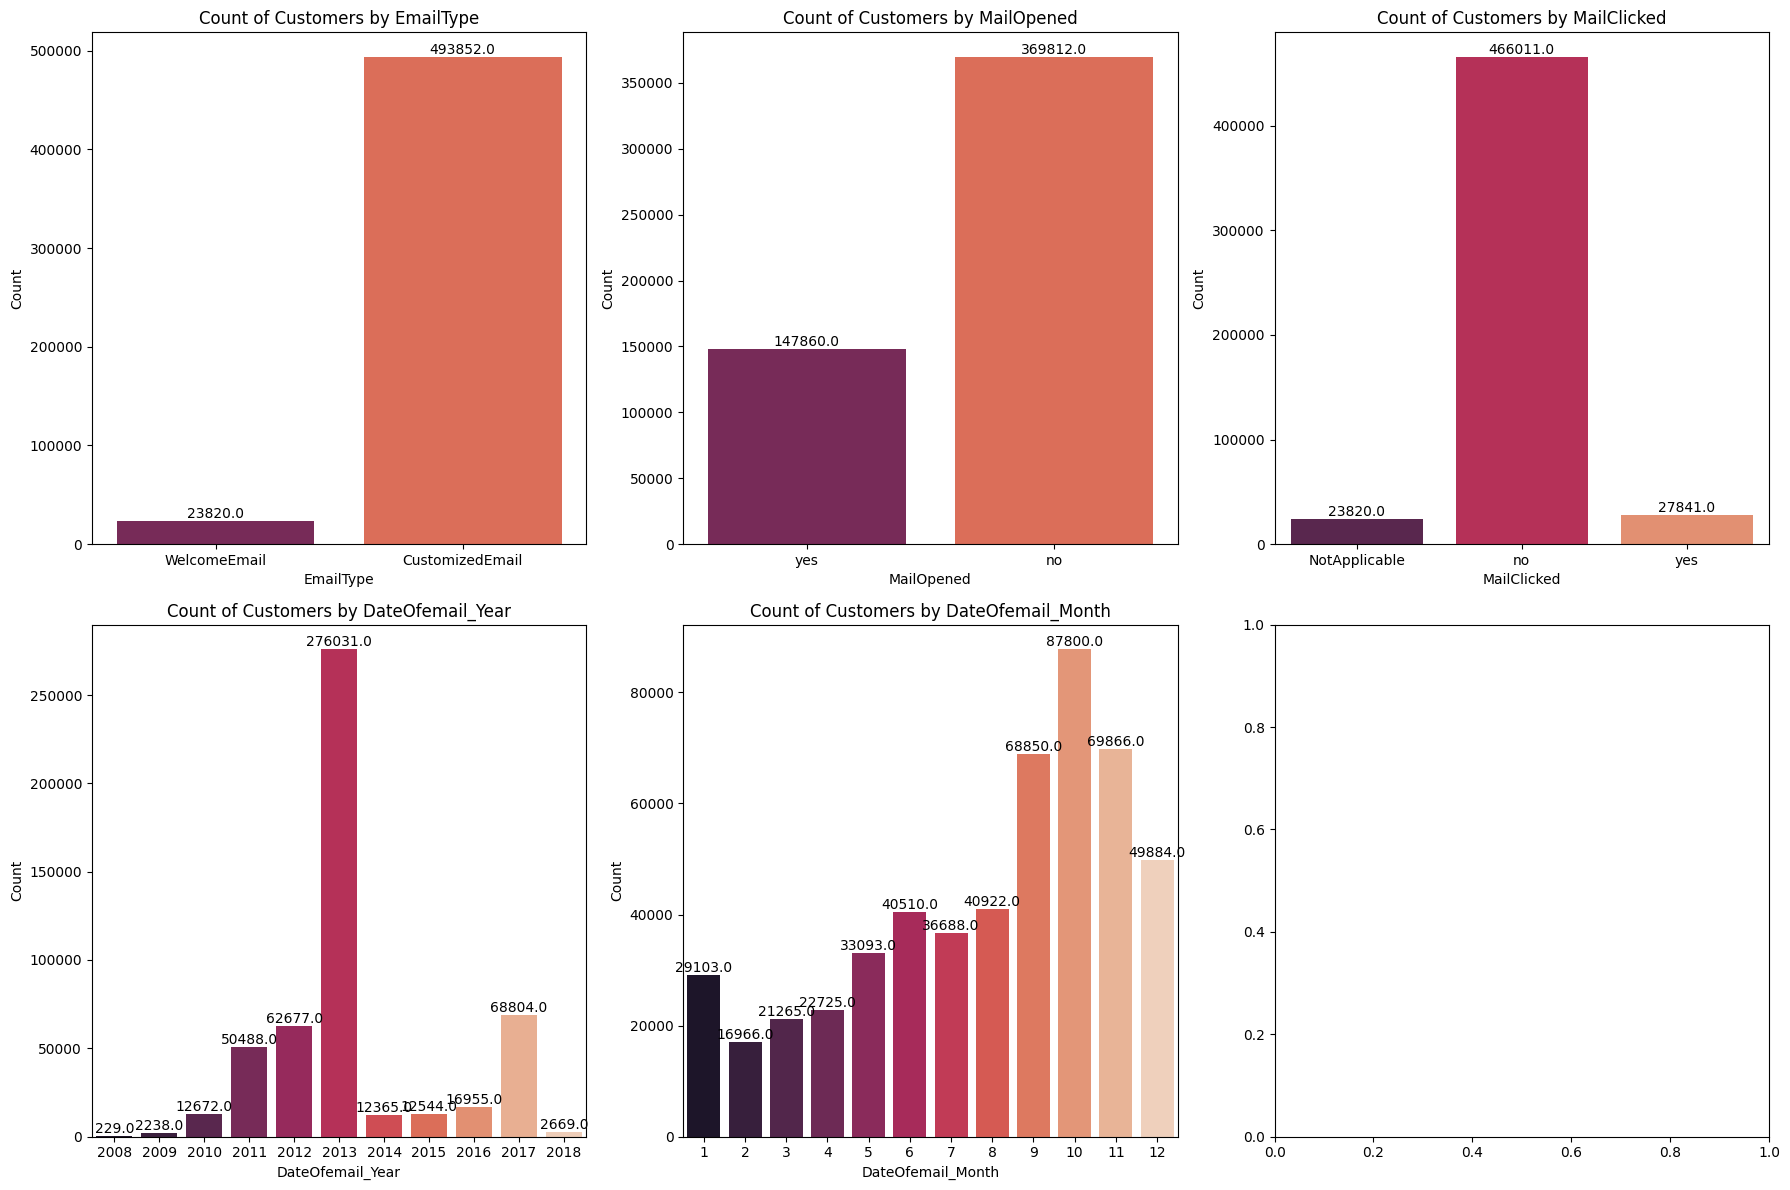

In [54]:
# Define the list of columns to plot
columns_to_plot = ['EmailType', 'MailOpened',	'MailClicked', 'DateOfemail_Year', 'DateOfemail_Month']

# Call the function with the data, columns, and size
plot_countplots_with_count(emaildata, columns_to_plot,rows=2, cols=3, figsize=(18, 12))

-> Each unique customer received a welcome email, which is classified under "mailclicked not applicable" since the email did not contain any links to offers or customized content.

-> Despite receiving a welcome email, many customers did not open it.
Most customers did not click on personalized emails sent by the retail company.

-> In 2013, the retail company sent a higher volume of emails than in other years.

-> Customers received more emails in the months of September, October, and November.

In [55]:
# Filter the DataFrame to include only rows where "EmailType" is "WelcomeEmail"
df_welcome = emaildata[emaildata["EmailType"] == "WelcomeEmail"]

df_welcome

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010,12,19
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010,10,3
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010,11,27
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009,12,4
...,...,...,...,...,...,...,...,...,...
23815,C23511,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018,1,17
23816,C12197,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018,1,17
23817,C40967,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018,1,17
23818,C36140,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018,1,17


In [56]:
# Count the number of rows in the filtered DataFrame
num_welcome_emails = len(df_welcome)

# Print the result
print("Number of welcome emails:", num_welcome_emails)


Number of welcome emails: 23820


In [57]:
# Print the length of customers who are click the emails

len(df_welcome["MailClicked"] == "Yes")

23820

In [58]:
# Print the length of customers who are opened the emails which are under notapplicable category

len(df_welcome["MailOpened"] == "NotApplicable")

23820

Each unique customer has received the welcome email, and all of those emails have been opened. These welcome emails fall under the category of "mail clicked," but are marked as "not applicable" because they do not contain any customized links.

In [59]:
# Filter the DataFrame to include only rows where "EmailType" is "WelcomeEmail"
df_customized = emaildata[emaildata["EmailType"] == "CustomizedEmail"]
df_customized

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
23820,C16368,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013,5,20
23821,C16368,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013,2,5
23822,C16368,2012-11-26,CustomizedEmail,11:22:32,yes,no,2012,11,26
23823,C16368,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013,5,30
23824,C16368,2013-05-18,CustomizedEmail,10:18:16,yes,no,2013,5,18
...,...,...,...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes,2018,1,18
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no,2018,1,21
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018,1,20
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018,1,20


<ipython-input-60-0e64f30aa544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customized['timestamp'] = pd.to_datetime(df_customized['timestamp'])
<ipython-input-60-0e64f30aa544>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customized['hour_sent'] = df_customized['timestamp'].dt.hour


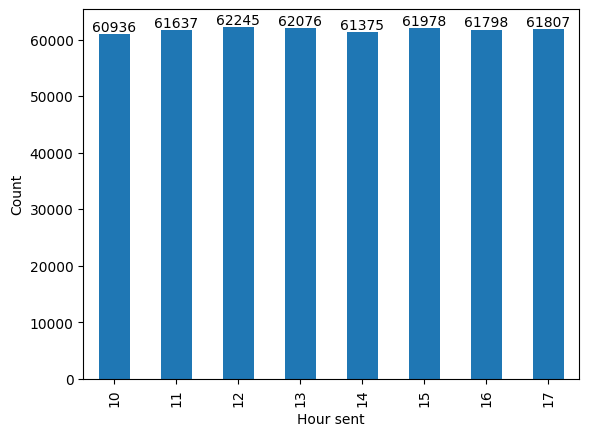

In [60]:
# Convert timestamp column to datetime format
df_customized['timestamp'] = pd.to_datetime(df_customized['timestamp'])

# Extract hour component from timestamp column
df_customized['hour_sent'] = df_customized['timestamp'].dt.hour

# Group the data by hour_sent and count the number of emails sent in each hour
hour_counts_sent = df_customized.groupby('hour_sent')['CustomerID'].count()

# Create a bar plot of the counts
ax = hour_counts_sent.plot.bar(x='hour_sent', y='Count')

# Set the x-axis and y-axis labels
ax.set_xlabel('Hour sent')
ax.set_ylabel('Count')

# Add text labels with the count values on top of each bar
for i, count in enumerate(hour_counts_sent):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [61]:
# Locate the MailOpened is Yes from Customized email data
df_customized_opened = df_customized[df_customized["MailOpened"] == "yes"]
df_customized_opened.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day,hour_sent
23820,C16368,2013-05-20,CustomizedEmail,2023-04-07 15:10:30,yes,no,2013,5,20,15
23821,C16368,2013-02-05,CustomizedEmail,2023-04-07 13:54:22,yes,no,2013,2,5,13
23822,C16368,2012-11-26,CustomizedEmail,2023-04-07 11:22:32,yes,no,2012,11,26,11
23823,C16368,2013-05-30,CustomizedEmail,2023-04-07 14:04:42,yes,no,2013,5,30,14
23824,C16368,2013-05-18,CustomizedEmail,2023-04-07 10:18:16,yes,no,2013,5,18,10


<ipython-input-62-25e10dffa6ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customized_opened['hour_sent_opened'] = df_customized_opened['timestamp'].dt.hour


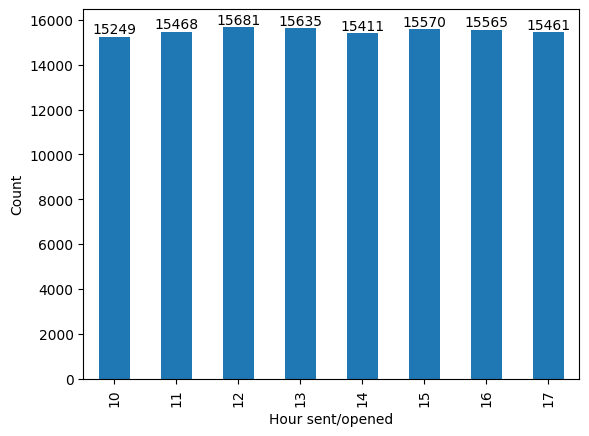

In [62]:
# Extract hour component from timestamp column
df_customized_opened['hour_sent_opened'] = df_customized_opened['timestamp'].dt.hour

# Group the data by hour_sent and count the number of emails sent/opened in each hour
hour_counts_sent_opened = df_customized_opened.groupby('hour_sent_opened')['CustomerID'].count()

# Create a bar plot of the counts
hour_counts_sent_opened.plot.bar(x='hour_sent_opened', y='Count')

# Set the x-axis and y-axis labels
plt.xlabel('Hour sent/opened')
plt.ylabel('Count')

# Add the count values as text labels on the bars
for i, count in enumerate(hour_counts_sent_opened):
    plt.text(i, count, str(count), ha='center', va='bottom')


In [63]:
# Locate the MailOpened is Yes from Customized Opened email data
df_customized_opened_clicked = df_customized_opened[df_customized_opened['MailClicked'] == 'yes']
df_customized_opened_clicked.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day,hour_sent,hour_sent_opened
23829,C16368,2013-04-07,CustomizedEmail,2023-04-07 13:35:30,yes,yes,2013,4,7,13,13
23849,C20345,2013-08-16,CustomizedEmail,2023-04-07 13:54:56,yes,yes,2013,8,16,13,13
23863,C20345,2013-02-18,CustomizedEmail,2023-04-07 16:04:50,yes,yes,2013,2,18,16,16
23867,C20345,2011-05-16,CustomizedEmail,2023-04-07 10:49:32,yes,yes,2011,5,16,10,10
23886,C20345,2012-11-08,CustomizedEmail,2023-04-07 12:14:40,yes,yes,2012,11,8,12,12


<ipython-input-64-07f35a587d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customized_opened_clicked['hour_sent_clicked'] = df_customized_opened_clicked['timestamp'].dt.hour


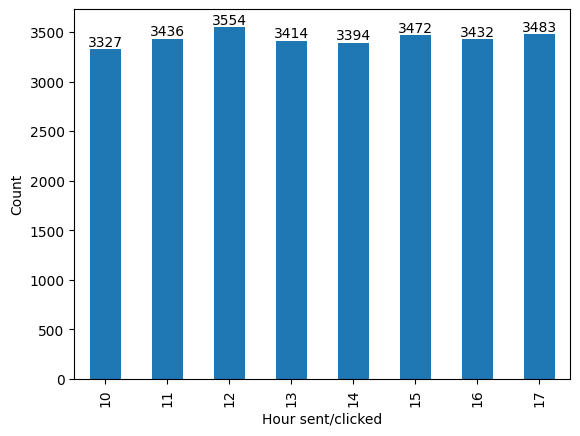

In [64]:
# Extract hour component from timestamp column
df_customized_opened_clicked['hour_sent_clicked'] = df_customized_opened_clicked['timestamp'].dt.hour

# Group the data by hour_sent and count the number of emails sent in each hour
hour_counts_sent_clicked = df_customized_opened_clicked.groupby('hour_sent_clicked')['CustomerID'].count()

# Plot the results
hour_counts_sent_clicked.plot.bar(x='hour_sent_clicked', y='Count')

# Set the x-axis and y-axis labels
plt.xlabel('Hour sent/clicked')
plt.ylabel('Count')

# Add the count values as text labels on the bars
for i, count in enumerate(hour_counts_sent_clicked):
    plt.text(i, count, str(count), ha='center', va='bottom')


In [65]:
# Convert the DateOfemail column to a datetime format
emaildata['DateOfemail'] = pd.to_datetime(emaildata['DateOfemail'])

# Group the data by CustomerID and year, and count the number of emails sent in each year
yearly_counts = emaildata.groupby(['CustomerID', emaildata['DateOfemail'].dt.year])['EmailType'].count()

# Print the results
yearly_counts.head(20)

CustomerID  DateOfemail
C12116      2013           32
C12117      2013            1
C12118      2013            1
C12119      2013           42
C12120      2014            1
C12122      2012           15
            2013           31
C12123      2013           23
            2014            6
C12124      2013           33
C12125      2013           45
C12126      2013            1
C12127      2016           46
C12128      2013           44
C12129      2013            2
C12130      2017           46
C12131      2012           22
            2013           30
C12133      2017           36
C12137      2017            1
Name: EmailType, dtype: int64

-> Most customers have only received welcome emails, and they haven't received any customized emails.

-> Many customers haven't opened their emails.

->When they did open their emails, many customers didn't click on them.

->In 2013, the company sent the highest number of emails. In the remaining years, the number of emails the company sent was very low.

->This may be one of the causes of the low retention potential of customers, which is very high. 

In [66]:
def plot_customized_emails_by_customer(df_customized, year):
    # Filter the DataFrame to only include the rows where DateOfemail_Year is the specified year
    df_customized_year = df_customized[df_customized['DateOfemail_Year'] == year]

    # Group the data by CustomerID and count the number of occurrences for each customer
    customer_counts = df_customized_year.groupby('CustomerID')['EmailType'].count()

    return customer_counts.count()

In [67]:
plot_customized_emails_by_customer(df_customized, 2008)

28

In [68]:
def count_welcome_emails(df, year):
    # Filter the DataFrame to only include the rows where DateOfemail_Year is the specified year
    df_welcome_2008 = df_welcome[df_welcome['DateOfemail_Year'] == 2008]
    # Group the data by CustomerID and count the number of occurrences for each customer
    customer_counts = df_welcome_2008.groupby('CustomerID')['EmailType'].count()
    return customer_counts.count()

In [69]:
def count_customized_emails(df):
    # Create an empty dictionary to store the customer counts for each year
    customer_counts_by_year = {}

    # Loop through the years 2008 to 2018
    for year in range(2008, 2019):
        # Filter the DataFrame to only include the rows where DateOfemail_Year is the specified year
        df_welcome_year = df[df['DateOfemail_Year'] == year]

        # Group the data by CustomerID and count the number of occurrences for each customer
        customer_counts = df_welcome_year.groupby('CustomerID')['EmailType'].count()

        # Store the customer counts for the current year in the dictionary
        customer_counts_by_year[year] = customer_counts.count()

    # Create a bar plot of the customer counts by year
    plt.bar(customer_counts_by_year.keys(), customer_counts_by_year.values())
    plt.xlabel('Year')
    plt.ylabel('Number of customers who received welcome emails')
    plt.show()

    return customer_counts_by_year

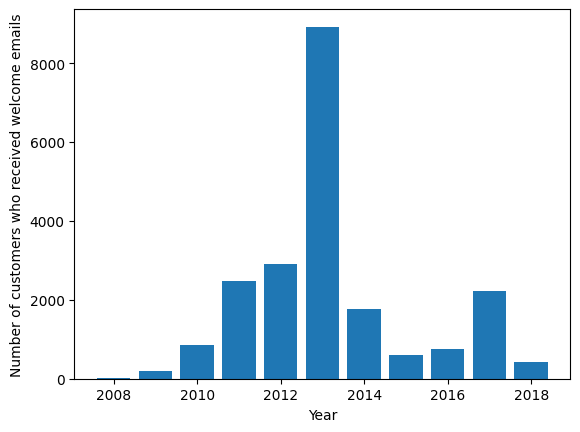

{2008: 28,
 2009: 187,
 2010: 863,
 2011: 2475,
 2012: 2916,
 2013: 8923,
 2014: 1763,
 2015: 597,
 2016: 758,
 2017: 2225,
 2018: 423}

In [70]:
count_customized_emails(df_customized)

##Train Data

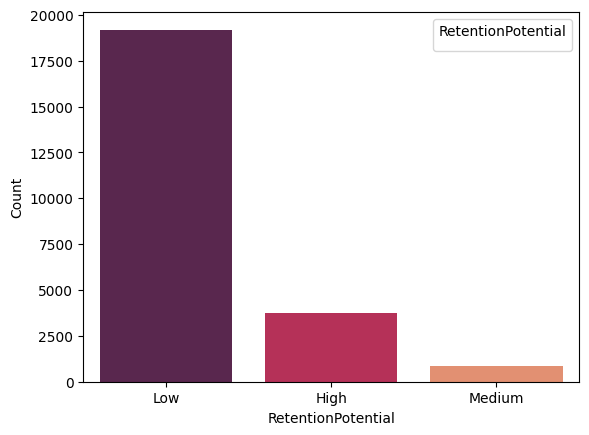

In [71]:
sns.countplot(x='RetentionPotential', data=traindata, palette='rocket')
plt.xlabel('RetentionPotential')
plt.ylabel('Count')
plt.legend(title='RetentionPotential', loc='upper right')

##Transactions Data

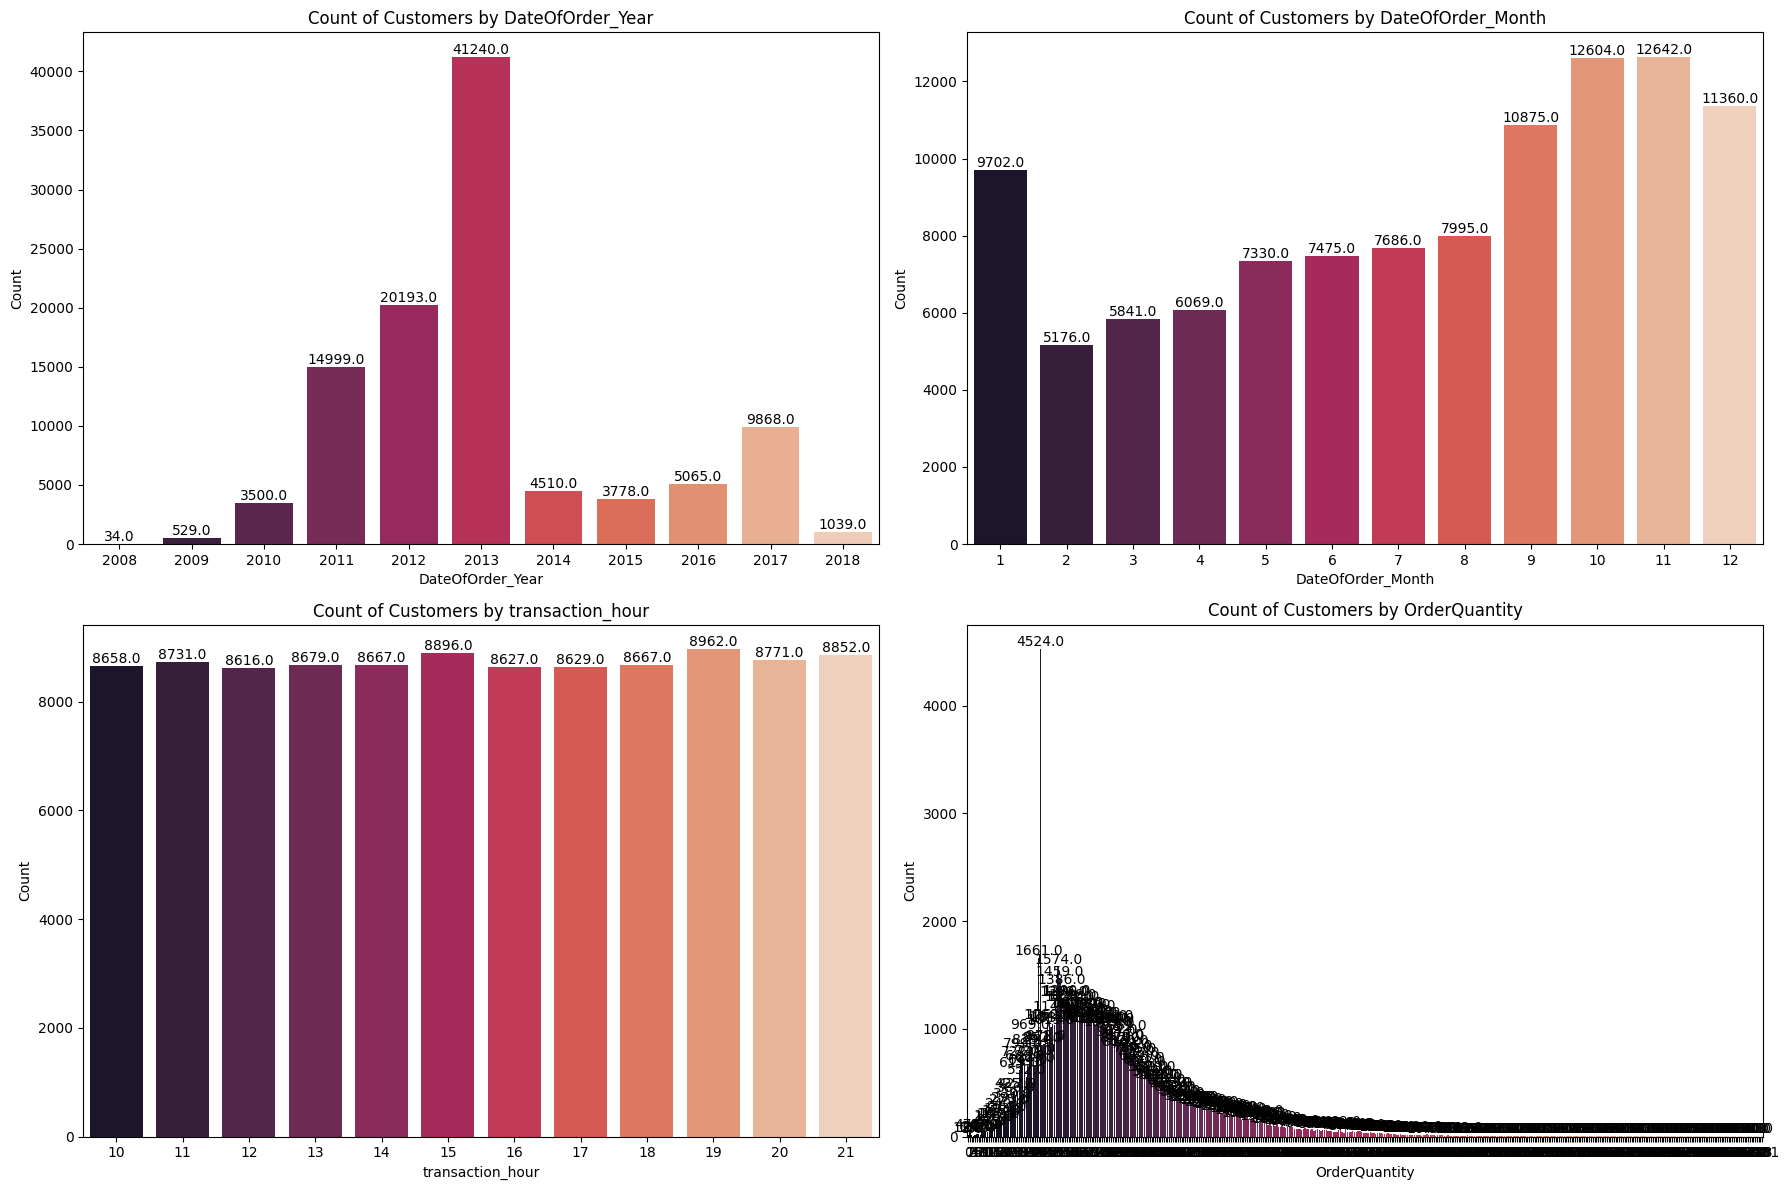

In [72]:
# Define the list of columns to plot
columns_to_plot = ['DateOfOrder_Year'	,'DateOfOrder_Month', 'transaction_hour', 'OrderQuantity']

# Call the function with the data, columns, and size
plot_countplots_with_count(transactionsdata, columns_to_plot,rows=2, cols=2, figsize=(18, 12))

In [73]:
# print the minimum order quantity

transactionsdata['OrderQuantity'].min()

0

In [74]:
# print the maximum order quantity

transactionsdata['OrderQuantity'].max()

1501

# Data Preprocessing

## Customerdata_Train

In [75]:
customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4


In [76]:
# Drop the DateOfRegistration column

customerdata = customerdata.drop('DateOfRegistration', axis=1)

In [77]:
# initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# fit and transform the categorical column
customerdata['City'] = ordinal_encoder.fit_transform(customerdata[['City']])

In [78]:
# Fit the ordinal encoded column

customerdata['PreferredDeliveryDay'] = ordinal_encoder.fit_transform(customerdata[['PreferredDeliveryDay']])

In [79]:
# Print the top five rows

customerdata.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,1.0,0,0,0,1.0,2012,9,28
1,C20345,1.0,1,1,1,0.0,2010,12,19
2,C17683,1.0,0,0,0,6.0,2010,10,3
3,C18647,3.0,0,0,0,1.0,2010,11,27
4,C36692,1.0,1,1,0,0.0,2009,12,4


## Emaildata_Train

In [80]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010,12,19
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010,10,3
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010,11,27
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009,12,4


In [81]:
# convert the 'timestamp' column to a datetime object
emaildata['timestamp'] = pd.to_datetime(emaildata['timestamp'])

# create a new column to represent the time difference between emails for each customer
emaildata['time_diff'] = emaildata.groupby('CustomerID')['timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# calculate the counts of each email type for each customer
counts = emaildata.groupby(['CustomerID', 'EmailType'])['EmailType'].count().unstack(fill_value=0).add_prefix('EmailType_')


# calculate the counts of opened/clicked emails for each customer
opens_clicks = emaildata.groupby('CustomerID').agg({
    'MailOpened': lambda x: sum(x == 'yes'),
    'MailClicked': lambda x: sum(x == 'yes')
})

# count the number of 'yes' and 'no' entries for each customer and merge the counts with the opens/clicks data
counts1 = pd.concat([
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'yes'),
        'MailClicked': lambda x: sum(x == 'yes')
    }),
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'no')
    }).rename(columns={'MailOpened': 'MailOpened_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'no')
    }).rename(columns={'MailClicked': 'MailClicked_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'NotApplicable')
    }).rename(columns={'MailClicked': 'MailClicked_NotApplicable'})
], axis=1)

# select the columns of interest and rename them
counts1 = counts1[['MailOpened', 'MailOpened_no', 'MailClicked', 'MailClicked_no', 'MailClicked_NotApplicable']]
counts1.columns = ['MailOpened_yes', 'MailOpened_no', 'MailClicked_yes', 'MailClicked_no', 'MailClicked_notapplicable']

In [82]:
# calculate the minimum and maximum timestamps for each customer
min_max_timestamp = emaildata.groupby('CustomerID').agg({
    'timestamp': ['min', 'max']
})
min_max_timestamp.columns = ['email_timestamp_min', 'email_timestamp_max']

In [83]:
# calculate the minimum and maximum dates of emails for each customer
min_max_date = emaildata.groupby('CustomerID').agg({
    'DateOfemail': ['min', 'max']
})
min_max_date.columns = ['DateOfemail_min', 'DateOfemail_max']

In [84]:
# calculate the count of emails for each customer
email_count = emaildata.groupby('CustomerID')['timestamp'].count().rename('email_count')

In [85]:
# Concate the the counts, counts1, min_max_timestamp, min_max_date, email_count datasets to one dataframe

emaildata1 = pd.concat([counts, counts1, min_max_timestamp, min_max_date, email_count], axis=1)

emaildata1.head()

,EmailType_CustomizedEmail,EmailType_WelcomeEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,email_timestamp_min,email_timestamp_max,DateOfemail_min,DateOfemail_max,email_count
CustomerID,,,,,,,,,,,,
C12116,31,1,5,27,2,29,1,2023-04-07 10:10:08,2023-04-07 17:56:42,2013-09-23,2013-10-09,32
C12117,0,1,1,0,0,0,1,2023-04-07 15:59:30,2023-04-07 15:59:30,2013-12-05,2013-12-05,1
C12118,0,1,1,0,0,0,1,2023-04-07 14:49:14,2023-04-07 14:49:14,2013-09-10,2013-09-10,1
C12119,41,1,14,28,4,37,1,2023-04-07 10:08:00,2023-04-07 17:52:28,2013-04-13,2013-10-21,42
C12120,0,1,1,0,0,0,1,2023-04-07 11:40:10,2023-04-07 11:40:10,2014-01-10,2014-01-10,1


In [86]:
for index in emaildata1['email_count'].value_counts(normalize=False).index:
    print(f"Count of {index}: {emaildata1['email_count'].value_counts(normalize=False)[index]}")

Count of 1: 9709
Count of 46: 1241
Count of 45: 721
Count of 48: 585
Count of 44: 561
Count of 17: 557
Count of 47: 528
Count of 43: 496
Count of 37: 491
Count of 41: 465
Count of 38: 455
Count of 36: 446
Count of 42: 446
Count of 39: 421
Count of 40: 402
Count of 33: 371
Count of 34: 370
Count of 35: 352
Count of 32: 328
Count of 49: 318
Count of 31: 311
Count of 30: 261
Count of 28: 191
Count of 27: 176
Count of 29: 176
Count of 19: 176
Count of 50: 164
Count of 26: 156
Count of 52: 154
Count of 51: 152
Count of 3: 143
Count of 25: 139
Count of 4: 128
Count of 24: 122
Count of 53: 115
Count of 2: 109
Count of 23: 106
Count of 22: 102
Count of 9: 101
Count of 13: 97
Count of 5: 96
Count of 8: 91
Count of 21: 87
Count of 55: 85
Count of 11: 82
Count of 10: 82
Count of 7: 79
Count of 54: 78
Count of 18: 78
Count of 12: 75
Count of 20: 74
Count of 6: 73
Count of 14: 64
Count of 15: 63
Count of 16: 62
Count of 56: 59
Count of 57: 49
Count of 58: 34
Count of 60: 32
Count of 59: 27
Count of

In [87]:
# Apply the funtion on DateOfemail_min column

emaildata1 = process_date_columns(emaildata1, 'DateOfemail_min')

In [88]:
emaildata1 = process_date_columns(emaildata1, 'DateOfemail_max')

In [89]:
# extract hour from timestamp column
emaildata1['email_timestamp_min_hr'] = pd.to_datetime(emaildata1['email_timestamp_min']).dt.hour

In [90]:
# extract hour from timestamp column
emaildata1['email_timestamp_max_hr'] = pd.to_datetime(emaildata1['email_timestamp_max']).dt.hour

In [91]:
# drop the unnecessary columns

emaildata1 = emaildata1.drop(['DateOfemail_min', 'DateOfemail_max', 'email_timestamp_min', 'email_timestamp_max', 'MailClicked_notapplicable', 'EmailType_WelcomeEmail'], axis=1)

In [92]:
emaildata1.head()

,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,email_count,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day,DateOfemail_max_Year,DateOfemail_max_Month,DateOfemail_max_Day,email_timestamp_min_hr,email_timestamp_max_hr
CustomerID,,,,,,,,,,,,,,
C12116,31,5,27,2,29,32,2013,9,23,2013,10,9,10,17
C12117,0,1,0,0,0,1,2013,12,5,2013,12,5,15,15
C12118,0,1,0,0,0,1,2013,9,10,2013,9,10,14,14
C12119,41,14,28,4,37,42,2013,4,13,2013,10,21,10,17
C12120,0,1,0,0,0,1,2014,1,10,2014,1,10,11,11


In [93]:
emaildata1.isnull().sum()

EmailType_CustomizedEmail    0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
MailClicked_no               0
email_count                  0
DateOfemail_min_Year         0
DateOfemail_min_Month        0
DateOfemail_min_Day          0
DateOfemail_max_Year         0
DateOfemail_max_Month        0
DateOfemail_max_Day          0
email_timestamp_min_hr       0
email_timestamp_max_hr       0
dtype: int64

In [94]:
emaildata1.shape

(23820, 14)

## Train_Data

In [95]:
traindata.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [96]:
# create an instance of the label encoder
label_encoder = LabelEncoder()

traindata['RetentionPotential'] = label_encoder.fit_transform(traindata['RetentionPotential'])


In [97]:
traindata.head()

,CustomerID,RetentionPotential
0,C37869,1
1,C33841,1
2,C29464,1
3,C28158,1
4,C22785,0


## Transactionsdata_Train

In [98]:
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity,DateOfOrder_Year,DateOfOrder_Month,DateOfOrder_Day,transaction_hour
0,C16368,2013-08-11,15:17:52,15,2013,8,11,15
1,C20345,2011-04-01,19:50:00,92,2011,4,1,19
2,C20345,2012-06-29,15:11:56,95,2012,6,29,15
3,C20345,2012-09-22,20:49:10,74,2012,9,22,20
4,C20345,2011-08-23,11:50:26,81,2011,8,23,11


In [99]:
# Add new features based on transaction data
customer_features = transactionsdata.groupby('CustomerID').agg({
    'DateOfOrder_Year': ['min', 'max', 'count'],
    'DateOfOrder_Month': ['min', 'max', 'count'],
    'DateOfOrder_Day': ['min', 'max', 'count'],
    'timestamp': ['min', 'max'],
    'OrderQuantity': ['mean']
})

# Flatten the multi-level column names
customer_features.columns = [f"{col[0]}_{col[1]}" for col in customer_features.columns]

# Calculate the time between consecutive orders
transactionsdata['DateOfOrder'] = pd.to_datetime(transactionsdata['DateOfOrder'])
transactionsdata = transactionsdata.sort_values(by=['CustomerID', 'DateOfOrder'])
transactionsdata['time_diff'] = transactionsdata.groupby('CustomerID')['DateOfOrder'].diff()

# Add the time between consecutive orders as a feature
time_diff = transactionsdata.groupby('CustomerID')['time_diff'].mean()
customer_features = customer_features.join(time_diff)

# Reset the index to convert the groupby object to a new DataFrame
customer_features = customer_features.reset_index()

# Print the head of the new DataFrame
customer_features.head()

,CustomerID,DateOfOrder_Year_min,DateOfOrder_Year_max,DateOfOrder_Year_count,DateOfOrder_Month_min,DateOfOrder_Month_max,DateOfOrder_Month_count,DateOfOrder_Day_min,DateOfOrder_Day_max,DateOfOrder_Day_count,timestamp_min,timestamp_max,OrderQuantity_mean,time_diff
0,C12116,2013,2013,3,10,10,3,3,10,3,13:49:08,19:50:02,38.333333,3 days 12:00:00
1,C12117,2013,2013,1,12,12,1,5,5,1,18:47:14,18:47:14,41.000000,NaT
2,C12118,2013,2013,1,9,9,1,10,10,1,10:08:42,10:08:42,41.000000,NaT
3,C12119,2013,2013,1,10,10,1,22,22,1,20:48:00,20:48:00,52.000000,NaT
4,C12120,2014,2014,1,1,1,1,10,10,1,13:24:12,13:24:12,31.000000,NaT


In [100]:
# Drop the DateOfOrder_Year_count, DateOfOrder_Month_count columns

customer_features = customer_features.drop(['DateOfOrder_Year_count', 'DateOfOrder_Month_count'], axis=1)

In [101]:
# rename column 'A' to 'new_name'
customer_features = customer_features.rename(columns={'DateOfOrder_Day_count': 'DateOfOrder_count'})

In [102]:
# extract hour from timestamp column
customer_features['order_timestamp_min_hr'] = pd.to_datetime(customer_features['timestamp_min']).dt.hour

In [103]:
# extract hour from timestamp column
customer_features['order_timestamp_max_hr'] = pd.to_datetime(customer_features['timestamp_max']).dt.hour

In [104]:
# Replace NaN values in time_diff with 0 time difference
customer_features['time_diff'] = customer_features['time_diff'].replace(np.nan, 0)

In [105]:
# convert the time_diff column to string
customer_features['time_diff'] = customer_features['time_diff'].astype(str)

# extract only the number of days from the time_diff column
customer_features['days_diff'] = customer_features['time_diff'].str.split(' ').str[0]

# convert the days_diff column to integer type
customer_features['days_diff'] = customer_features['days_diff'].astype(int)

In [106]:
# Drop the timestamp_min, timestamp_max, time_diff columns

customer_features = customer_features.drop(['timestamp_min', 'timestamp_max', 'time_diff'], axis=1)

In [107]:
# print the first 5 rows of the final dataframe to verify the changes
customer_features.head()

,CustomerID,DateOfOrder_Year_min,DateOfOrder_Year_max,DateOfOrder_Month_min,DateOfOrder_Month_max,DateOfOrder_Day_min,DateOfOrder_Day_max,DateOfOrder_count,OrderQuantity_mean,order_timestamp_min_hr,order_timestamp_max_hr,days_diff
0,C12116,2013,2013,10,10,3,10,3,38.333333,13,19,3
1,C12117,2013,2013,12,12,5,5,1,41.000000,18,18,0
2,C12118,2013,2013,9,9,10,10,1,41.000000,10,10,0
3,C12119,2013,2013,10,10,22,22,1,52.000000,20,20,0
4,C12120,2014,2014,1,1,10,10,1,31.000000,13,13,0


In [108]:
customer_features.isnull().sum()

CustomerID                0
DateOfOrder_Year_min      0
DateOfOrder_Year_max      0
DateOfOrder_Month_min     0
DateOfOrder_Month_max     0
DateOfOrder_Day_min       0
DateOfOrder_Day_max       0
DateOfOrder_count         0
OrderQuantity_mean        0
order_timestamp_min_hr    0
order_timestamp_max_hr    0
days_diff                 0
dtype: int64

In [109]:
customer_features.shape

(23820, 12)

# Merged Data

In [110]:
# Merge the datasets based on customerID
merged_data = pd.merge(customerdata, emaildata1, on="CustomerID")
merged_data = pd.merge(merged_data, customer_features, on="CustomerID")
merged_data = pd.merge(merged_data, traindata, on="CustomerID")

In [111]:
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,DateOfOrder_Month_min,DateOfOrder_Month_max,DateOfOrder_Day_min,DateOfOrder_Day_max,DateOfOrder_count,OrderQuantity_mean,order_timestamp_min_hr,order_timestamp_max_hr,days_diff,RetentionPotential
0,C16368,1.0,0,0,0,1.0,2012,9,28,29,...,8,8,11,11,1,15.000000,15,15,0,0
1,C20345,1.0,1,1,1,0.0,2010,12,19,95,...,1,12,1,31,186,83.946237,10,21,5,1
2,C17683,1.0,0,0,0,6.0,2010,10,3,0,...,1,12,1,28,13,34.076923,10,21,18,2
3,C18647,3.0,0,0,0,1.0,2010,11,27,30,...,1,12,11,29,7,106.857143,11,19,131,1
4,C36692,1.0,1,1,0,0.0,2009,12,4,64,...,1,12,2,31,34,69.117647,10,21,25,1


In [112]:
merged_data.shape

(23820, 35)

# Visualizations

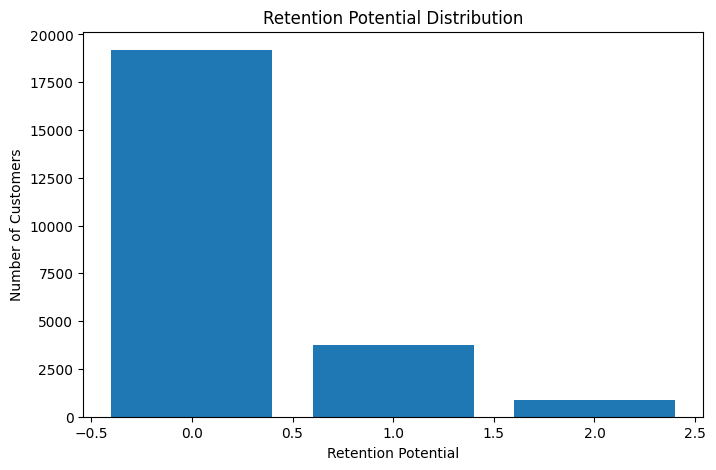

In [136]:
# Create a bar plot of retention potential
plt.figure(figsize=(8,5))
plt.bar(merged_data['RetentionPotential'].unique(), merged_data['RetentionPotential'].value_counts())

# Set the title and axis labels
plt.title('Retention Potential Distribution')
plt.xlabel('Retention Potential')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

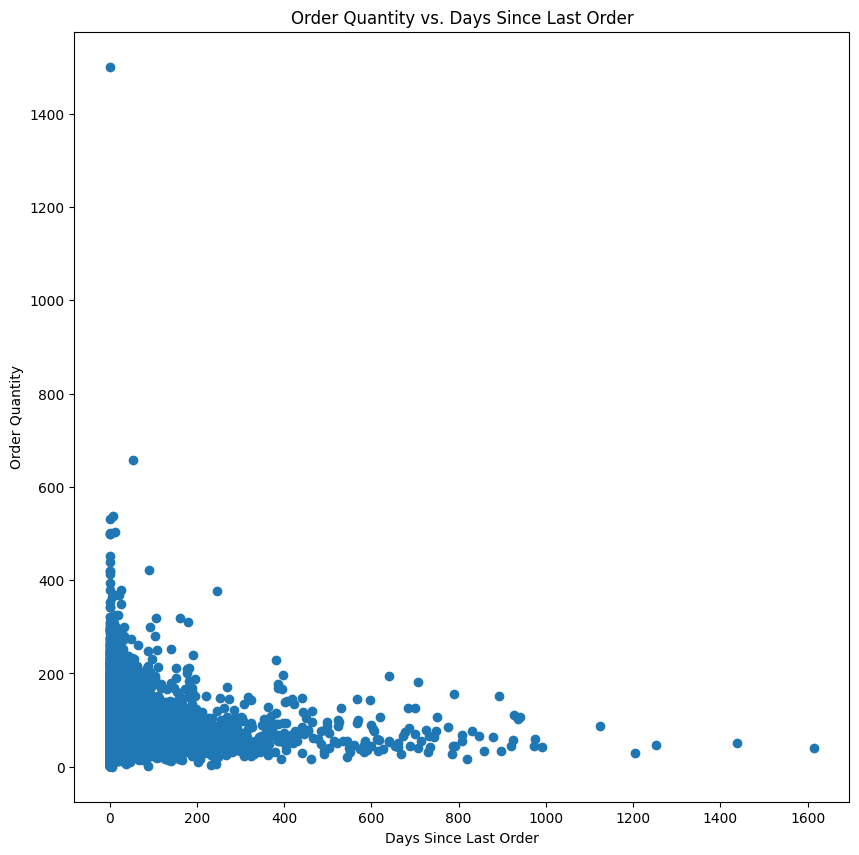

In [114]:
# Create a scatter plot of OrderQuantity_mean vs. days_diff
plt.figure(figsize=(10,10))
plt.scatter(merged_data['days_diff'], merged_data['OrderQuantity_mean'])

# Set the title and axis labels
plt.title('Order Quantity vs. Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Order Quantity')

# Show the plot
plt.show()

--> It is evident that a significant number of customers have a substantial time gap between their orders, indicating a lack of regular engagement with the company. To improve customer retention, the company can focus on sending more personalized emails and increasing their frequency of communication with customers.

<Figure size 1000x1000 with 0 Axes>

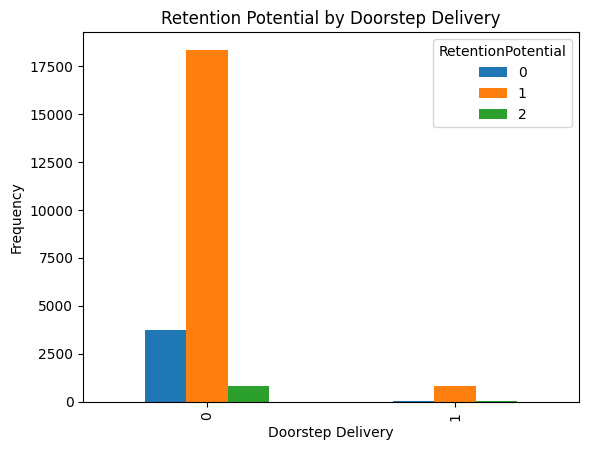

In [115]:

# Group the data by DoorstepDelivery and RetentionPotential
grouped_data = merged_data.groupby(['DoorstepDelivery', 'RetentionPotential'])['CustomerID'].count().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(10,10))
grouped_data.plot(kind='bar')

# Set the title and axis labels
plt.title('Retention Potential by Doorstep Delivery')
plt.xlabel('Doorstep Delivery')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The number of customers who do not prefer doorstep delivery is higher among those with low retention potential.

<Figure size 1000x1000 with 0 Axes>

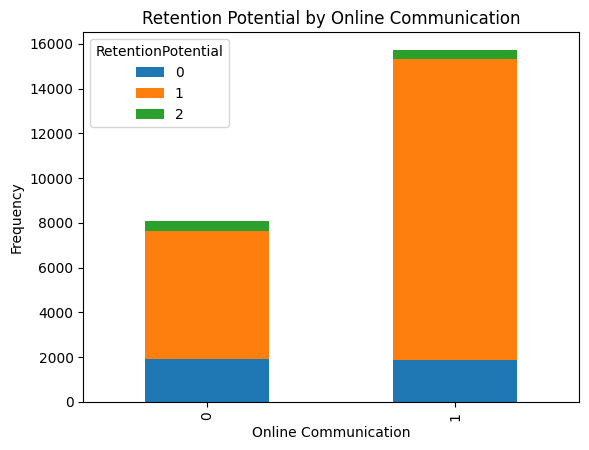

In [116]:
# Group the data by OnlineCommunication and RetentionPotential
grouped_data = merged_data.groupby(['OnlineCommunication', 'RetentionPotential'])['CustomerID'].count().unstack()
plt.figure(figsize=(10,10))

# Plot the stacked bar plot
grouped_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Retention Potential by Online Communication')
plt.xlabel('Online Communication')
plt.ylabel('Frequency')

# Show the plot
plt.show()


--> The number of customers who prefer online communication is very high, and the number of customers with low retention potential is also very high.

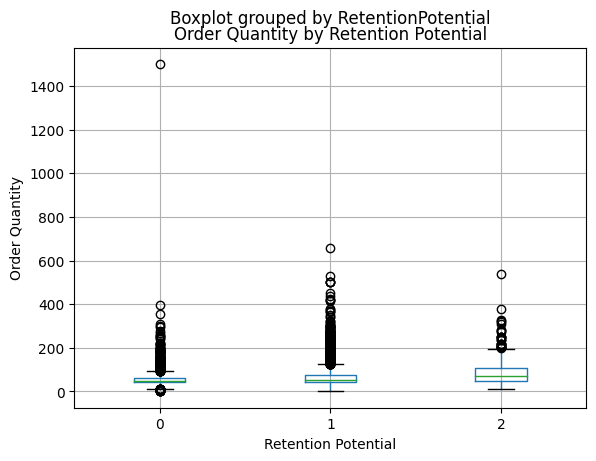

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a box plot of OrderQuantity_mean by retention potential
merged_data.boxplot(column='OrderQuantity_mean', by='RetentionPotential')

# Set the title and axis labels
plt.title('Order Quantity by Retention Potential')
plt.xlabel('Retention Potential')
plt.ylabel('Order Quantity')

# Show the plot
plt.show()

--> The mean order value is generally consistent across all days of the week, but there are some instances where the order value is higher than expected. These values may not necessarily be considered as outliers, as it is possible that these orders were placed by frequent customers who typically order larger quantities.

<Figure size 1000x1000 with 0 Axes>

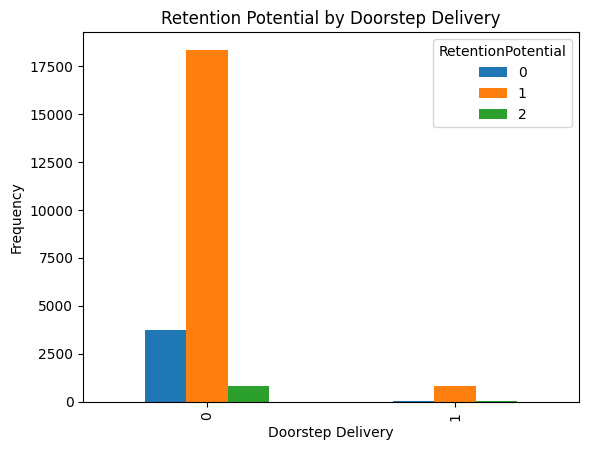

In [119]:
# Create a histogram of the days_diff variable
grouped_data = merged_data.groupby(['DoorstepDelivery', 'RetentionPotential'])['CustomerID'].count().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(10,10))
grouped_data.plot(kind='bar')

# Set the title and axis labels
plt.title('Retention Potential by Doorstep Delivery')
plt.xlabel('Doorstep Delivery')
plt.ylabel('Frequency')

# Show the plot
plt.show()



-->  The low retention potential of customers who do not opt for Doorstep Delivery is very high, and there are also more high retention potential customers who are not enrolled Doorstep Delivery , compared to those who are enrolled in Doorstep Delivery.

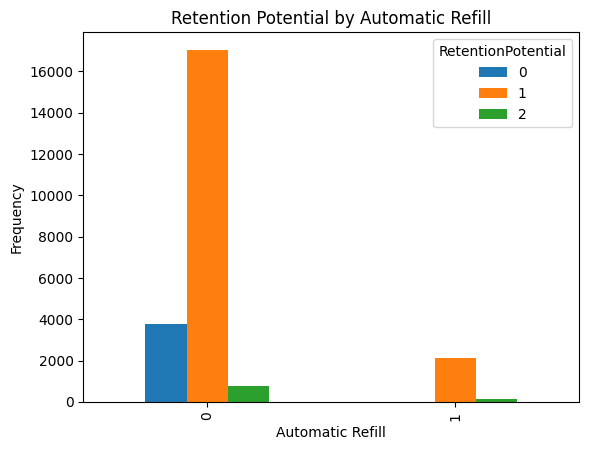

In [120]:
# Group the data by AutomaticRefill and RetentionPotential
grouped_data = merged_data.groupby(['AutomaticRefill', 'RetentionPotential'])['CustomerID'].count().unstack()

# Plot the grouped bar plot
grouped_data.plot(kind='bar')

# Set the title and axis labels
plt.title('Retention Potential by Automatic Refill')
plt.xlabel('Automatic Refill')
plt.ylabel('Frequency')

# Show the plot
plt.show()


--> The low retention potential of customers who do not opt for Automatic Refill is very high, and there are also more high retention potential customers who are not enrolled in automatic refill, compared to those who are enrolled in automatic refill.

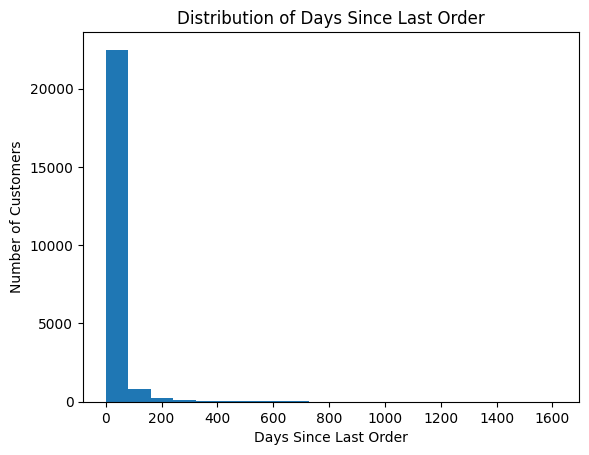

In [121]:
plt.hist(merged_data['days_diff'], bins=20)

# Set the title and axis labels
plt.title('Distribution of Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


--> Most customers are under the 0 to 100 days difference since their last order

In [122]:
merged_data['MailClicked_no']

0        28
1        85
2         0
3        26
4        54
         ..
23815     0
23816     0
23817     0
23818     5
23819     0
Name: MailClicked_no, Length: 23820, dtype: int64

In [125]:
merged_data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'MailClicked_no', 'email_count',
       'DateOfemail_min_Year', 'DateOfemail_min_Month', 'DateOfemail_min_Day',
       'DateOfemail_max_Year', 'DateOfemail_max_Month', 'DateOfemail_max_Day',
       'email_timestamp_min_hr', 'email_timestamp_max_hr',
       'DateOfOrder_Year_min', 'DateOfOrder_Year_max', 'DateOfOrder_Month_min',
       'DateOfOrder_Month_max', 'DateOfOrder_Day_min', 'DateOfOrder_Day_max',
       'DateOfOrder_count', 'OrderQuantity_mean', 'order_timestamp_min_hr',
       'order_timestamp_max_hr', 'days_diff', 'RetentionPotential'],
      dtype='object')

In [126]:
# Print the unique values in each column

for i in merged_data:
    print('\n',"************",i,"**************",'\n',merged_data[i].unique())


 ************ CustomerID ************** 
 ['C16368' 'C20345' 'C17683' ... 'C40967' 'C36140' 'C42003']

 ************ City ************** 
 [1. 3. 2. 0.]

 ************ OnlineCommunication ************** 
 [0 1]

 ************ AutomaticRefill ************** 
 [0 1]

 ************ DoorstepDelivery ************** 
 [0 1]

 ************ PreferredDeliveryDay ************** 
 [1. 0. 6. 5. 4. 3. 2.]

 ************ DateOfRegistration_Year ************** 
 [2012 2010 2009 2011 2008 2013 2014 2015 2016 2017 2018]

 ************ DateOfRegistration_Month ************** 
 [ 9 12 10 11  7  3  4  8  2  1  5  6]

 ************ DateOfRegistration_Day ************** 
 [28 19  3 27  4 29 22 16 25 14 11  8 30  2 18 12 10 26 24  7 13 20 15 23
 21  5  9  6 31  1 17]

 ************ EmailType_CustomizedEmail ************** 
 [ 29  95   0  30  64  34  48  40  69  38  16  45  57  46  47  18  49  50
  53  23  41  42  33  44  39  52  37  11  22  32  43  31  36  60  14   3
  87  51  35  12  59  27  58  26  55  54

In [127]:
corr_matrix = merged_data.corr()
corr_matrix

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,...,DateOfOrder_Month_min,DateOfOrder_Month_max,DateOfOrder_Day_min,DateOfOrder_Day_max,DateOfOrder_count,OrderQuantity_mean,order_timestamp_min_hr,order_timestamp_max_hr,days_diff,RetentionPotential
City,1.000000,0.044251,0.049538,-0.020502,-0.047617,0.069841,0.034828,0.002763,-0.042451,-0.031323,...,0.081216,0.014910,0.030156,-0.050494,-0.065940,-0.057552,0.032609,-0.050008,-0.041128,-0.029075
OnlineCommunication,0.044251,1.000000,0.176233,0.097039,-0.046521,0.369337,0.326963,-0.045351,-0.140738,0.023039,...,0.291932,0.168367,0.082323,-0.145056,-0.071282,-0.157753,0.109774,-0.109449,-0.212865,0.096118
AutomaticRefill,0.049538,0.176233,1.000000,0.185477,-0.038464,0.078984,0.080580,-0.025341,0.010611,0.105075,...,-0.034393,0.058371,-0.052083,0.013016,0.073452,-0.062561,-0.025942,0.038262,-0.055351,0.132296
DoorstepDelivery,-0.020502,0.097039,0.185477,1.000000,-0.041438,0.054473,0.036979,-0.003553,0.053197,0.121297,...,-0.092713,0.044734,-0.079710,0.041377,0.084710,0.052508,-0.058892,0.060637,-0.030317,0.063044
PreferredDeliveryDay,-0.047617,-0.046521,-0.038464,-0.041438,1.000000,-0.016636,-0.018275,-0.000157,0.015438,0.009550,...,0.002098,-0.018309,0.009613,0.000221,-0.014916,0.001386,0.012549,-0.001567,0.018255,-0.011308
DateOfRegistration_Year,0.069841,0.369337,0.078984,0.054473,-0.016636,1.000000,0.030868,-0.034352,-0.072686,-0.008637,...,0.128996,-0.065784,0.086970,-0.136757,-0.178773,-0.078179,0.108932,-0.102559,-0.159663,0.038816
DateOfRegistration_Month,0.034828,0.326963,0.080580,0.036979,-0.018275,0.030868,1.000000,-0.008321,-0.134866,-0.030793,...,0.574932,0.617602,0.095496,-0.087024,-0.110504,-0.132739,0.086309,-0.083402,-0.088297,-0.008700
DateOfRegistration_Day,0.002763,-0.045351,-0.025341,-0.003553,-0.000157,-0.034352,-0.008321,1.000000,0.048705,0.030014,...,0.007877,0.052252,0.353279,0.392166,0.012220,0.011625,-0.007645,0.024498,0.001413,-0.015678
EmailType_CustomizedEmail,-0.042451,-0.140738,0.010611,0.053197,0.015438,-0.072686,-0.134866,0.048705,1.000000,0.518360,...,-0.285234,0.163618,-0.242641,0.309571,0.277229,0.223719,-0.258854,0.262393,0.195869,0.262246
MailOpened_yes,-0.031323,0.023039,0.105075,0.121297,0.009550,-0.008637,-0.030793,0.030014,0.518360,1.000000,...,-0.237069,0.186455,-0.228060,0.236886,0.293098,0.133095,-0.214395,0.222940,0.117445,0.153933


<Axes: >

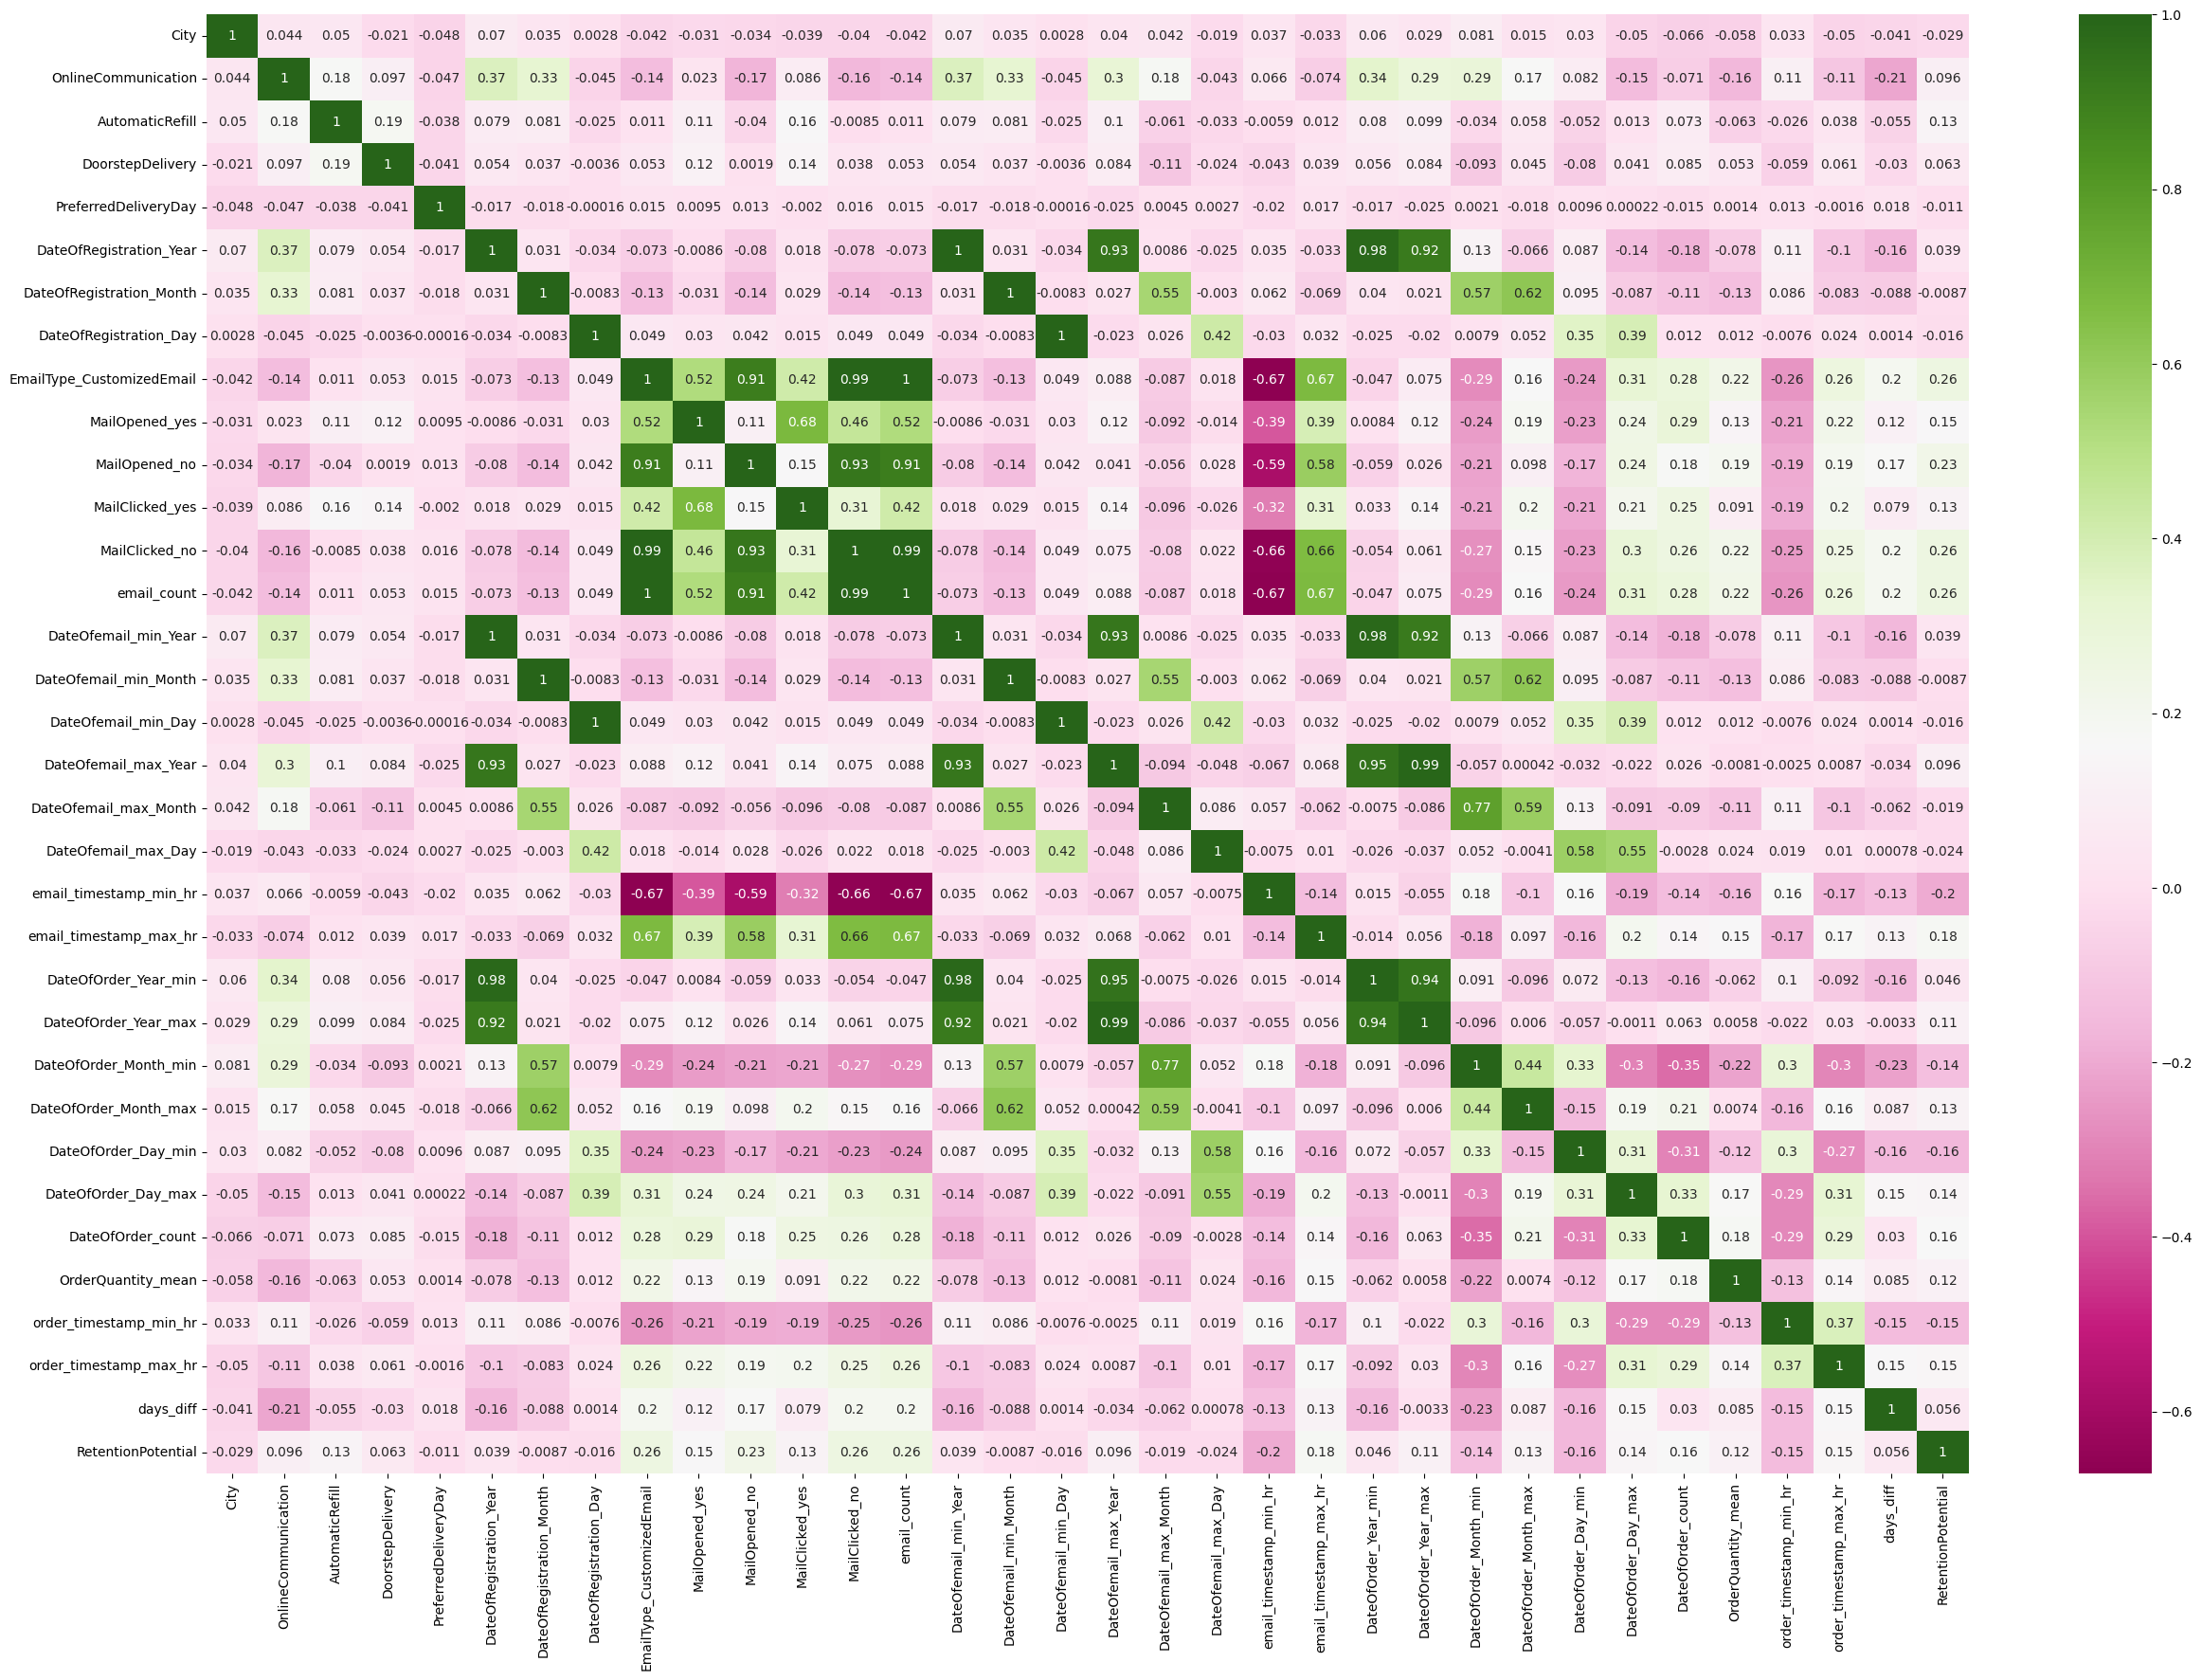

In [128]:
# Plot the heatmap

plt.figure(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')

In [129]:
# Identify highly correlated columns
high_corr_cols = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = high_corr_cols.stack().reset_index()
high_corr_cols.columns = ['col1', 'col2', 'correlation']
high_corr_cols = high_corr_cols[high_corr_cols['correlation'] > 0.9]

# Identify columns to drop
cols_to_drop = []
for index, row in high_corr_cols.iterrows():
    if row['col1'] not in cols_to_drop and row['col2'] not in cols_to_drop:
        if corr_matrix[row['col1']].mean() > corr_matrix[row['col2']].mean():
            if abs(corr_matrix[row['col2']]['RetentionPotential']) < abs(corr_matrix[row['col1']]['RetentionPotential']):
                cols_to_drop.append(row['col1'])
            else:
                cols_to_drop.append(row['col2'])
        else:
            if abs(corr_matrix[row['col1']]['RetentionPotential']) < abs(corr_matrix[row['col2']]['RetentionPotential']):
                cols_to_drop.append(row['col2'])
            else:
                cols_to_drop.append(row['col1'])

print(cols_to_drop)

['DateOfemail_min_Year', 'DateOfemail_max_Year', 'DateOfOrder_Year_min', 'DateOfOrder_Year_max', 'DateOfRegistration_Month', 'DateOfRegistration_Day', 'EmailType_CustomizedEmail', 'MailClicked_no', 'email_count']


In [130]:
# Print the highly correlated columns and the correlation

high_corr_cols

,col1,col2,correlation
163,DateOfRegistration_Year,DateOfemail_min_Year,1.000000
166,DateOfRegistration_Year,DateOfemail_max_Year,0.932161
171,DateOfRegistration_Year,DateOfOrder_Year_min,0.980628
172,DateOfRegistration_Year,DateOfOrder_Year_max,0.916185
191,DateOfRegistration_Month,DateOfemail_min_Month,1.000000
218,DateOfRegistration_Day,DateOfemail_min_Day,1.000000
237,EmailType_CustomizedEmail,MailOpened_no,0.906364
239,EmailType_CustomizedEmail,MailClicked_no,0.993642
240,EmailType_CustomizedEmail,email_count,1.000000
286,MailOpened_no,MailClicked_no,0.928700


In [131]:
# Drop the highly correlated columns

merged_data = merged_data.drop(['DateOfemail_min_Year', 'DateOfemail_max_Year', 'DateOfOrder_Year_min', 'DateOfOrder_Year_max', 
                                'DateOfRegistration_Month', 'DateOfRegistration_Day', 'EmailType_CustomizedEmail', 'MailClicked_no', 
                                'email_count'], axis=1)

In [ ]:
# Print the shape of the merged data

merged_data.shape

In [133]:
# Print the columns of merged data

merged_data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'MailOpened_yes', 'MailOpened_no', 'MailClicked_yes',
       'DateOfemail_min_Month', 'DateOfemail_min_Day', 'DateOfemail_max_Month',
       'DateOfemail_max_Day', 'email_timestamp_min_hr',
       'email_timestamp_max_hr', 'DateOfOrder_Month_min',
       'DateOfOrder_Month_max', 'DateOfOrder_Day_min', 'DateOfOrder_Day_max',
       'DateOfOrder_count', 'OrderQuantity_mean', 'order_timestamp_min_hr',
       'order_timestamp_max_hr', 'days_diff', 'RetentionPotential'],
      dtype='object')

# Split Data

In [134]:
X = merged_data.drop(['RetentionPotential'], axis=1).values
y = merged_data['RetentionPotential'].values

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)